# Data Challenge

# Summary

### Problem Statement

### Outline of Analysis Steps

# Data Prep

### Load data and libraries

## First glimpse of what's going on

### Data Cleaning

Based on the initial glimpse from above and looking at the unique values for each column, it looks like the following datatypes need to be modified:
- Channel and Customer should not be treated as ints
- All other columns should be ints
- Convert Year column values of '08/01/2016' to just 2016

Additionally, even though there are 801 rows, there are not 801 non-null values for all columns. We'll throw out those rows and see how many rows we lose in total, as well as check for duplcates.

In [1]:
cust = cust.dropna()
cust = cust.drop_duplicates()
cust = cust[cust.Fresh != 'unrecorded']
cust = cust[cust.Milk != 'unrecorded']
cust = cust[cust.Grocery != 'unrecorded']
cust = cust[cust.Frozen != 'unrecorded']
cust = cust[cust.Detergents_Paper != 'unrecorded']
cust = cust[cust.Delicassen != 'unrecorded']
print("Number of rows: ", str(cust.shape[0]))

In [ ]:
# formatting the Year column to be more uniform
def fixYear(year):
    """
    a simple function to convert formatting for the year column
    """
    if year == '08/01/2016':
        new_year = '2016'
    else:
        new_year = year
    return new_year

cust['Year'] = cust.Year.apply(fixYear)
cust.Year.unique()

In [ ]:
# as above but a list comprehesion
cust['NextYear'] = [row + 1 for row in cust['Year']]

In [ ]:
# datatype conversions
cust.Channel = cust.Channel.astype(str)
cust.Customer = cust.Customer.astype(str)
cust.Fresh = cust.Fresh.astype(int)
cust.Milk = cust.Milk.astype(int)
cust.Grocery = cust.Grocery.astype(int)
cust.Frozen = cust.Frozen.astype(int)
cust.Detergents_Paper = cust.Detergents_Paper.astype(int)
cust.Delicassen = cust.Delicassen.astype(int)
cust.info()

### New Feature Creation

In [1]:
# total spending
cust['Total'] = cust.apply(lambda x: x['Fresh'] + x['Milk'] + x['Grocery'] + 
                           x['Detergents_Paper'] + x['Delicassen'], axis=1)
cust.head()

# Exploratory Data Analysis

### Descriptive stats


A little more detail here

In [ ]:
print('TOTAL SPENDING')
print('\nHotel & Resturants:')
print(cust.Total[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Total[(cust.Channel == '2')].describe())

print('\n\nFRESH')
print('\nHotel & Resturants:')
print(cust.Fresh[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Fresh[(cust.Channel == '2')].describe())

print('\n\nMILK')
print('\nHotel & Resturants:')
print(cust.Milk[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Milk[(cust.Channel == '2')].describe())

print('\n\nGROCERY')
print('\nHotel & Resturants:')
print(cust.Grocery[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Grocery[(cust.Channel == '2')].describe())

print('\n\nFROZEN')
print('\nHotel & Resturants:')
print(cust.Frozen[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Frozen[(cust.Channel == '2')].describe())

print('\n\nDETERGENTS & PAPER:')
print('\nHotel & Resturants:')
print(cust.Detergents_Paper[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Detergents_Paper[(cust.Channel == '2')].describe())

print('\n\nDELICASSEN')
print('\nHotel & Resturants:')
print(cust.Delicassen[(cust.Channel == '1')].describe())
print('\nRetail:')
print(cust.Delicassen[(cust.Channel == '2')].describe())

There are 503 records for hotel/restaurants versus 267 for retail (including both 2016 and 2017). However, mean total spending for retail is greater (38698 vs 21681).

Hotels/restaurants have higher means for:
- Fresh (12898 vs 7495)
- Frozen (3332 vs 1443)

Retail has a higher mean for 
- Milk (9223 vs 3083)
- Grocery (14065 vs 3645)
- Detergents_Paper (6454 vs 758)
- Delicassen (1460 vs 1295)

### Pairplots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Paired plot comparing Channel (hotels/restaurants versus retail)
sns.set(style = 'ticks', color_codes = True)
sns.pairplot(cust, 
             hue = 'Channel', 
             palette = "Paired", 
             vars = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen'])

In [3]:
# Plots to look for outliers

In [ ]:
# box plots
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

sns.boxplot(x="total_price_bins", y="total_price", hue="sold_true", data=books[(books.price < 40)], palette="Set3")

In [4]:
# Scatterplots
sns.set_style("ticks")
rest_plot = sns.scatterplot(x="INSPECTION TYPE_y", y="SCORE", hue = "CRITICAL FLAG", style="CRITICAL FLAG", data=re_ins)
plt.xlabel('Number of inspections in a single year')
plt.ylabel('Score')
rest_plot

In [ ]:
# side by side scatter plots
#Total price against date color coded by sold or for sale
# There seem to be a higher proporiton of free shipping purchases to non free shipping purchases in the sold graph!
%matplotlib inline
import seaborn as sns
book_plot = sns.relplot(x="posted", y="price", col="free_shipping", hue = "sold", style="sold", data=books)
book_plot.set(xlim=(datetime.date(2015, 1, 1), datetime.date(2019, 8, 1)), ylim=(0,60))
book_plot

In [5]:
# Histograms
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

sns.set(color_codes=True)

sns.distplot(x, bins=20, kde=False, rug=True);
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, 60)

# another example
hist = re_ins['SCORE'].hist(bins = 10)

In [6]:
# Barplot

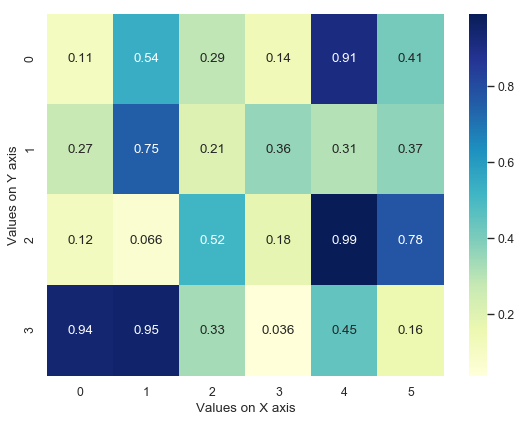

In [23]:
# Heatmap https://likegeeks.com/seaborn-heatmap-tutorial/
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

fig=plt.figure(figsize=(8, 6), dpi= 80, facecolor='w', edgecolor='k')
data = np.random.rand(4, 6)
heat_map = sb.heatmap(data, cmap="YlGnBu", annot=True)
sb.set()
plt.xlabel("Values on X axis")
plt.ylabel("Values on Y axis")
plt.show()

In [16]:
# Colinearity

# Asking some basic questions 

### Examples

In [ ]:
## How many inspections per year are being done at restaurants?
nyc['inspection_year'] = nyc['INSPECTION DATE'].map(lambda x: x.strftime('%Y'))
nyc.groupby('inspection_year').size()

# number of restaurants and the number of times they've been inspected
rests = nyc.groupby('CAMIS')
rests = rests.count()
rests = rests.sort_values('uniqueID', ascending = False)
rests = rests.rename(index=str, columns={"uniqueID": "total_inspections"})
rests.drop(['DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'PHONE', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE', 'INSPECTION TYPE', 'inspection_year'], axis=1, inplace=True)
rests.reset_index(inplace = True)
rests.info()

# Why are some restaurants having so many inspections every year?!
rest_by_year = nyc.groupby(['CAMIS', 'inspection_year', 'total_inspections'])
rest_by_year = rest_by_year.count()
rest_by_year = rest_by_year.sort_values(['total_inspections', 'CAMIS', 'inspection_year'], ascending = False)

# What kind of inspections are being done?
inspections = nyc.groupby('INSPECTION TYPE')
inspections = inspections.count()
inspections = inspections.sort_values('uniqueID', ascending = False)
print("Number of inspection types: ", str(inspections.shape[0]))
print("Total number of unique inspections: ", str(nyc.shape[0]))
inspections

# Grouping, counting, and sorting
rest_by_year = re_ins.groupby(['CAMIS', 'inspection_year', 'total_inspections'])
rest_by_year = rest_by_year.count()
rest_by_year = rest_by_year.sort_values(['total_inspections', 'CAMIS', 'inspection_year'], ascending = False)
rest_by_year

# as above but also dropping columns and fixing index
ins_per_year = nyc.groupby(['CAMIS', 'inspection_year', 'INSPECTION TYPE'])
ins_per_year = ins_per_year.count()
ins_per_year = ins_per_year.sort_values('PHONE', ascending = False)
ins_per_year.drop(['DBA', 'BORO', 'BUILDING', 'STREET', 'ZIPCODE',
       'uniqueID', 'CUISINE DESCRIPTION', 'INSPECTION DATE', 'ACTION',
       'VIOLATION CODE', 'VIOLATION DESCRIPTION', 'CRITICAL FLAG', 'SCORE',
       'GRADE', 'GRADE DATE', 'RECORD DATE'], axis=1, inplace=True)
ins_per_year.reset_index(inplace = True)
ins_per_year.info()

### Joins

In [ ]:
# Merging data if necessary
# adding this as a column to dataframe for future use
rests['CAMIS']=pd.to_numeric(rests['CAMIS'])
nyc = pd.merge(nyc, rests, on='CAMIS', how='right')

### Filters

In [ ]:
# filtered down to just these two types of inspections
init_ins = nyc[nyc['INSPECTION TYPE'] == "Cycle Inspection / Initial Inspection"]
re_ins = nyc[nyc['INSPECTION TYPE'] == "Cycle Inspection / Re-inspection"]

# final cleaned up dataset that I'm going to work with
re_ins = re_ins[re_ins['SCORE'] <= 40]

# Basic Modelling

thank you P! https://www.statsmodels.org/stable/index.html

In [5]:
# statsmodel t-test
x_ = (373,398,245,272,238,241,134,410,158,125,198,252,577,272,208,260)
y_ = (411,571,320,564,311,590,1563,424,528,544,246,371,680,384,579,303, 500)

import statsmodels.api as sm
sm.stats.ttest_ind(x_, y_)


(-3.163662110843406, 0.0034775881731400264, 31.0)

In [ ]:
# statsmodel for regression

In [ ]:
# Linear mixed effects models
# https://www.statsmodels.org/stable/examples/notebooks/generated/mixed_lm_example.html
data = sm.datasets.get_rdataset('dietox', 'geepack').data
md = smf.mixedlm("Weight ~ Time", data, groups=data["Pig"])
mdf = md.fit()
print(mdf.summary())


# Validation

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

# Results and Recommendations